In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from google.colab import files
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import io

df = pd.read_csv("USA Housing Dataset.csv")
df['bathrooms'] = df ['bathrooms'].astype(int)
df['floors'] = df ['floors'].astype(int)
df['bedrooms'] = df ['bedrooms'].astype(int)
df['price'] = df ['price'].astype(int)
df = df[df['price'] > 0]

El proyecto se realiza con la finalidad de encontrar el precio adecuado para vender una casa, o el precio que podría llegar a pagar un cliente por una casa que se amolde a sus necesidades.
El proyecto se va a ser en base a gráficos utilizando datos de casas varias y sus características.
Algunas de las preguntas más comunes podrían ser:
•	¿Cuáles son los barrios más caros?
•	Quiero una casa con X comodidades, ¿cual seria el precio aproximado?
•	¿Son mas baratas las casas antiguas o las mas modernas?

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000,3,2,1340,1384,3,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000,4,3,3540,159430,2,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888,5,6,7270,130017,2,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000,3,2,998,904,2,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900,5,2,3060,7015,1,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


Detección y limpieza de outliers

In [4]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

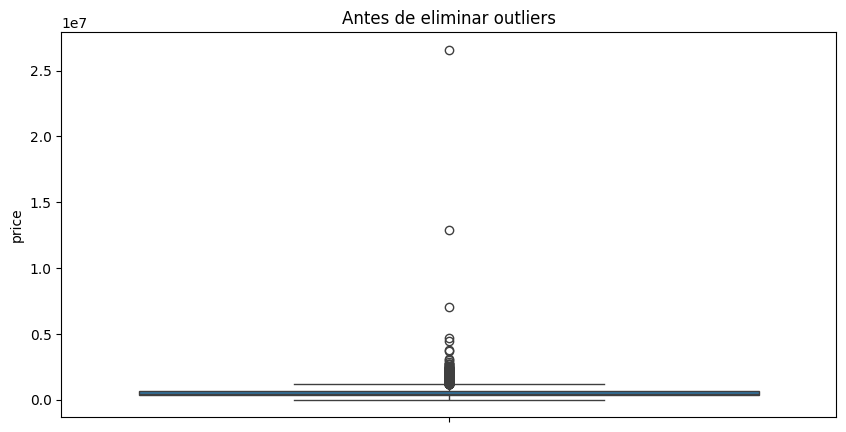

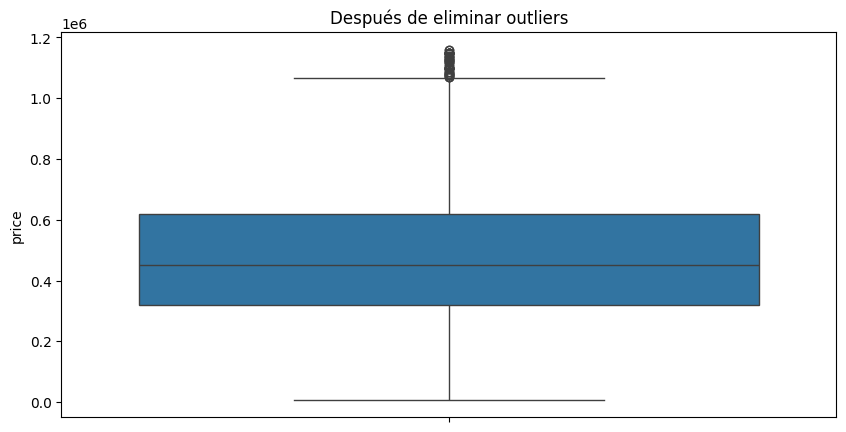

In [5]:

# Boxplot antes de eliminar outliers
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['price'])
plt.title("Antes de eliminar outliers")
plt.show()

# Boxplot después de eliminar outliers
plt.figure(figsize=(10, 5))
sns.boxplot(y=filtered_df['price'])
plt.title("Después de eliminar outliers")
plt.show()


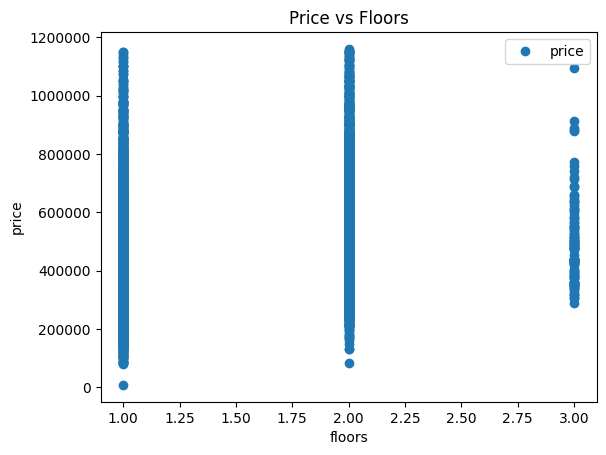

In [8]:
filtered_df.plot(x='floors', y='price', style="o")
plt.title("Price vs Floors")
plt.xlabel('floors')
plt.ylabel('price')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
plt.show()

Entrenamiento de modelo

In [54]:
filtered_df = filtered_df.dropna(axis=0)
y = filtered_df['price']
x = filtered_df[['bedrooms','floors','condition','sqft_above','yr_built']]


df_model = DecisionTreeRegressor(max_depth=5, random_state=42)
df_model.fit(x,y)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

df_model.fit(x_train,y_train)

y_pred = df_model.predict(x_test)


In [56]:
y_pred_train = df_model.predict(x_train)

In [57]:
print("MAE",mean_absolute_error(y_train,y_pred_train))

MAE 134517.19869682795


In [58]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 139921.6238861083


In [59]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 32652463599.150528
